<a href="https://colab.research.google.com/github/Kanyi254/Insurance-quotation/blob/Brandon/Automating_Professional_Indemnity_Insurance_Quotation_with_AI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automating Professional Indemnity Insurance Quotation with AI: A Predictive Model for Enhanced Efficiency and Accuracy

## 1. Business Understanding

### 1.1 Objective

The objective of this project is to develop an AI-driven tool that automates the professional indemnity insurance quotation process. By leveraging machine learning, this tool will streamline the quotation process, reducing the time and manual effort required to generate quotes. This automation will lead to faster responses for our business partners, thereby improving customer satisfaction, operational efficiency, and business relationships.

### 1.2 Problem Statement

This project addresses a regression problem where the target variable is the calculated insurance premium for professional indemnity policies. The traditional quotation process is manual, time-intensive, and prone to human error, which can delay responses to business partners and affect the accuracy of quotes. The goal is to replace this manual approach with an AI-driven system that uses machine learning models to predict the premium based on input data from proposal forms and financial documents. This project is particularly relevant for stakeholders in the insurance and reinsurance industries who require timely, reliable, and accurate premium estimates.

### 1.3 Success Criteria

Success in this project is defined by the tool’s ability to:

(i) Accurately predict insurance premiums: The AI model should produce premium predictions close to actual values calculated using the PI rating guide.

(ii) Reduce processing time: The tool should significantly shorten the time needed to generate quotes compared to the manual process.

(iii) Enhance customer satisfaction: Faster and more accurate quotes are expected to improve satisfaction for brokers, underwriters, and business partners.

(iv) Maintain a high degree of reliability: The model should avoid overestimating or underestimating premiums to ensure fair pricing for clients and profitability for the insurer.

## 2. Data Understanding

The data for this project is derived from various sources related to professional indemnity insurance proposals. This includes:

(i) Completed Proposal Forms: Forms submitted by clients, containing essential information about the insurance requirements.

(ii) PI Rating Guide: A guideline used to determine the insurance premium based on various risk factors.

(iii) Audited Financial Statements: Financial information about the client that can impact the risk assessment and premium calculations.

(iv) Operating Licenses: Regulatory documents that validate the client’s business operations, which may affect the eligibility and premium rating.

The combined data is expected to include both categorical features (such as client industry, occupation, and qualifications) and numerical features (such as estimated annual income, limit of indemnity, and deductibles).

### 2.2 Data Structure and Features

The primary features in the dataset include:

**Cedant Name:** The name of the client or insured party.
    
**Broker Name:** The intermediary who facilitates the insurance proposal between the client and the insurance provider.

**Period of Cover:** The start and end dates for the coverage period, which can be used to calculate the policy duration.
    
**Number of Business Partners:** A categorical feature indicating the number of entities involved, which can correlate with risk.

**Staff Qualifications:** A categorical feature representing the level of qualification among the client’s staff, which could impact the premium.

**Estimated Annual Income:** A numerical feature used to gauge the financial risk of the client.
    
**Limit of Indemnity:** The maximum amount covered under the policy, which directly impacts the premium calculation.
    
**Occupation of the Insured:** A categorical variable that may affect risk based on the industry.
    
**Applicable Deductibles:** The amount the client agrees to pay before insurance coverage applies, which can influence the premium.

### 2.3 Data Description and Exploration

We will start by loading the data and examining the structure, including the size, types of each column, and initial statistics. This will help identify missing values and inconsistencies that may require cleaning.

In [ ]:
# Import necessary libraries to start setting up the notebook structure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import json
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load datasets
data_3rd_qtr = pd.read_excel("Medical quota share treaty  3rd Qtr 2020.xlsx")
data_4th_qtr = pd.read_excel("BICOR LIFE - Medical Quota share - 4th qtr 2020.xlsx")

data_4th_qtr.head(), data_3rd_qtr.head()

(              Policy Holder ID  Principal beneficiary Dependants  \
 0                          NaN                    NaN        NaN   
 1          NDUWUMUKAMA CHARLES                    1.0          4   
 2     NSABIYUMVA JEAN BERTRAND                    1.0          2   
 3  BICOR VIE ET CAPITALISATION                   20.0         42   
 4     NDABARUSHIMANA DIEUDONNE                    1.0          4   
 
    Total beneficiaries   Police ID  Start Date of Cover End Date of Cover  \
 0                  NaN         NaN                  NaN               NaT   
 1                  5.0  20000030.0  2020-10-22 00:00:00        2021-10-21   
 2                  3.0  19000002.0  2020-10-23 00:00:00        2021-10-22   
 3                 62.0  19000005.0  2020-11-05 00:00:00        2021-11-04   
 4                  5.0  20000031.0  2020-12-04 00:00:00        2021-12-03   
 
                                                              Unnamed: 8  \
 0  Full Annual Premium Payable  Numbe

In [ ]:
# Checking data types and missing values in each dataset
data_3rd_qtr.info()
data_4th_qtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Policy Holder ID       14 non-null     object        
 1   Principal beneficiary  14 non-null     float64       
 2   Dependants             15 non-null     object        
 3   Total beneficiaries    14 non-null     float64       
 4   Police ID              14 non-null     float64       
 5   Start Date of Cover    14 non-null     object        
 6   End Date of Cover      14 non-null     datetime64[ns]
 7                          16 non-null     object        
 8   Unnamed: 8             15 non-null     object        
 9   Unnamed: 9             15 non-null     object        
 10  Unnamed: 10            16 non-null     object        
 11  Unnamed: 11            1 non-null      object        
 12  Premium Amount         15 non-null     float64       
 13  Benefit

In [ ]:
# Summary statistics for numerical columns
data_3rd_qtr.describe(), data_4th_qtr.describe()

(       Principal beneficiary  Total beneficiaries     Police ID  \
 count              14.000000            14.000000  1.400000e+01   
 mean               11.928571            43.785714  2.000002e+07   
 min                 0.000000             1.000000  2.000000e+07   
 25%                 1.000000             1.250000  2.000001e+07   
 50%                 3.000000             8.500000  2.000002e+07   
 75%                12.500000            29.500000  2.000002e+07   
 max                66.000000           317.000000  2.000003e+07   
 std                18.882081            86.712770  9.216862e+00   
 
                    End Date of Cover  Premium Amount  Premium Paid/Billed  
 count                             14    1.500000e+01         1.400000e+01  
 mean   2021-04-22 20:34:17.142857216    1.362678e+07         7.300059e+06  
 min              2020-10-16 00:00:00    1.428020e+05         1.428020e+05  
 25%              2020-12-31 00:00:00    1.070288e+06         1.019623e+06  
 

### 2.4 Data Cleaning and Preparation

In [ ]:
# Renaming columns in both datasets for consistency and readability
data_4th_qtr.columns = [
    'Policy_Holder_ID', 'Principal_beneficiary', 'Dependants', 'Total_beneficiaries',
    'Police_ID', 'Start_Date_of_Cover', 'End_Date_of_Cover', 'Annual_Premium_Payable',
    'Num_Payment_Installments', 'Amount_Payable_Per_Installment', 'Total_Premium_Paid_to_Date',
    'Outstanding_Premium_Balance', 'Premium_Amount', 'Benefit_Limit_Outpatient_per_family',
    'Benefit_Limit_Inpatient_per_family', 'Benefit_Limit_Dental_per_individual',
    'Benefit_Limit_Optic_per_individual', 'Benefit_Limit_Spectacle_per_individual',
    'Disability_Cover', 'Premium_Paid_Billed'
]

data_3rd_qtr.columns = [
    'Policy_Holder_ID', 'Principal_beneficiary', 'Dependants', 'Total_beneficiaries',
    'Police_ID', 'Start_Date_of_Cover', 'End_Date_of_Cover', 'Annual_Premium_Payable',
    'Num_Payment_Installments', 'Amount_Payable_Per_Installment', 'Total_Premium_Paid_to_Date',
    'Outstanding_Premium_Balance', 'Premium_Amount', 'Benefit_Limit_Outpatient_per_family',
    'Benefit_Limit_Inpatient_per_family', 'Benefit_Limit_Dental_per_individual',
    'Benefit_Limit_Optic_per_individual', 'Benefit_Limit_Spectacle_per_individual',
    'Disability_Cover', 'Premium_Paid_Billed'
]

In [ ]:
# Drop rows with NaN
data_4th_qtr.dropna(subset=['Policy_Holder_ID', 'Police_ID', 'Premium_Amount'], inplace=True)
data_3rd_qtr.dropna(subset=['Policy_Holder_ID', 'Police_ID', 'Premium_Amount'], inplace=True)

In [ ]:
# Merging datasets
merged_data = pd.concat([data_3rd_qtr, data_4th_qtr], ignore_index=True)

In [ ]:
# Convert date columns to datetime format
merged_data['Start_Date_of_Cover'] = pd.to_datetime(merged_data['Start_Date_of_Cover'], errors='coerce')
merged_data['End_Date_of_Cover'] = pd.to_datetime(merged_data['End_Date_of_Cover'], errors='coerce')

In [ ]:
# Display initial stats and structure after merging for verification
merged_data.info(), merged_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Policy_Holder_ID                        22 non-null     object        
 1   Principal_beneficiary                   22 non-null     float64       
 2   Dependants                              22 non-null     object        
 3   Total_beneficiaries                     22 non-null     float64       
 4   Police_ID                               22 non-null     float64       
 5   Start_Date_of_Cover                     19 non-null     datetime64[ns]
 6   End_Date_of_Cover                       22 non-null     datetime64[ns]
 7   Annual_Premium_Payable                  22 non-null     object        
 8   Num_Payment_Installments                22 non-null     object        
 9   Amount_Payable_Per_Installment          22 non-null     

(None,
        Principal_beneficiary  Total_beneficiaries     Police_ID  \
 count              22.000000            22.000000  2.200000e+01   
 mean                8.818182            31.727273  1.986365e+07   
 min                 0.000000             1.000000  1.900000e+07   
 25%                 1.000000             2.000000  2.000001e+07   
 50%                 1.500000             5.000000  2.000002e+07   
 75%                 8.000000            25.750000  2.000002e+07   
 max                66.000000           317.000000  2.000003e+07   
 std                15.924334            71.172615  3.512553e+05   
 
        Start_Date_of_Cover              End_Date_of_Cover  Premium_Amount  \
 count                   19                             22    2.200000e+01   
 mean   2020-09-11 00:00:00  2021-06-08 20:43:38.181818112    5.766771e+06   
 min    2020-07-01 00:00:00            2020-10-16 00:00:00    1.000000e+04   
 25%    2020-08-12 00:00:00            2021-02-22 06:00:00    6.138

In [ ]:
# Convert premium and financial limit columns to numeric where possible
financial_columns = [
    'Annual_Premium_Payable', 'Amount_Payable_Per_Installment',
    'Total_Premium_Paid_to_Date', 'Benefit_Limit_Outpatient_per_family',
    'Benefit_Limit_Inpatient_per_family', 'Benefit_Limit_Dental_per_individual',
    'Benefit_Limit_Optic_per_individual', 'Benefit_Limit_Spectacle_per_individual',
    'Disability_Cover'
]

# Clean and convert these columns to numeric, coercing errors to handle non-numeric data entries
for col in financial_columns:
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Display summary statistics to confirm successful conversion
merged_data[financial_columns].describe()

,Annual_Premium_Payable,Amount_Payable_Per_Installment,Total_Premium_Paid_to_Date,Benefit_Limit_Outpatient_per_family,Benefit_Limit_Inpatient_per_family,Benefit_Limit_Dental_per_individual,Benefit_Limit_Optic_per_individual,Benefit_Limit_Spectacle_per_individual,Disability_Cover
count,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,22.000000,22.000000,22.000000,2.200000e+01
mean,5.766771e+06,3.794878e+06,5.766771e+06,1.768182e+06,7.236364e+06,221181.818182,220909.090909,100727.272727,2.750000e+06
std,1.004217e+07,4.957404e+06,1.004217e+07,2.535723e+06,2.500580e+06,45190.218457,60151.324326,33412.546572,1.586776e+06
min,1.000000e+04,1.000000e+04,1.000000e+04,5.000000e+05,2.500000e+06,150000.000000,100000.000000,50000.000000,5.000000e+05
25%,6.138892e+05,6.138892e+05,6.138892e+05,1.200000e+06,7.400000e+06,200000.000000,200000.000000,100000.000000,1.000000e+06
50%,1.506744e+06,1.506744e+06,1.506744e+06,1.200000e+06,8.000000e+06,250000.000000,250000.000000,100000.000000,3.000000e+06
75%,5.557024e+06,5.557024e+06,5.557024e+06,1.500000e+06,8.000000e+06,250000.000000,250000.000000,100000.000000,3.500000e+06
max,3.703050e+07,1.778538e+07,3.703050e+07,1.300000e+07,1.300000e+07,300000.000000,360000.000000,216000.000000,5.000000e+06


The financial columns have been successfully converted to numeric types, and summary statistics indicate the following:

Premiums and benefit limits show a wide range, with high standard deviations indicating varied insurance policies.
Key benefit limits, such as outpatient and inpatient family coverage, display distinct quartiles, useful for segmenting policyholder needs.

In [ ]:
# Drop columns with all NaN values, such as Outstanding_Premium_Balance
merged_data = merged_data.drop(columns=['Outstanding_Premium_Balance'])

# Convert object columns to numeric, coercing errors to NaN for non-numeric entries
for col in [
    'Annual_Premium_Payable', 'Num_Payment_Installments',
    'Amount_Payable_Per_Installment', 'Benefit_Limit_Outpatient_per_family',
    'Benefit_Limit_Inpatient_per_family', 'Benefit_Limit_Dental_per_individual',
    'Benefit_Limit_Optic_per_individual', 'Benefit_Limit_Spectacle_per_individual',
    'Disability_Cover'
]:
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Handle missing values
# Fill missing numeric values with the median of each column
merged_data.fillna(merged_data.median(numeric_only=True), inplace=True)

# For the date columns with missing values, we will fill with a specific date or drop those rows
merged_data.dropna(subset=['Start_Date_of_Cover'], inplace=True)

# Verify that all columns are now numeric and missing values are handled
print(merged_data.info())
print(merged_data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 0 to 20
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Policy_Holder_ID                        19 non-null     object        
 1   Principal_beneficiary                   19 non-null     float64       
 2   Dependants                              19 non-null     object        
 3   Total_beneficiaries                     19 non-null     float64       
 4   Police_ID                               19 non-null     float64       
 5   Start_Date_of_Cover                     19 non-null     datetime64[ns]
 6   End_Date_of_Cover                       19 non-null     datetime64[ns]
 7   Annual_Premium_Payable                  19 non-null     int64         
 8   Num_Payment_Installments                19 non-null     int64         
 9   Amount_Payable_Per_Installment          19 non-null     int64

### 2.5 Exploratory Data Analysis (EDA)

This section explores the main features of the dataset and their relationships with the target variable, Premium_Amount. Our goal is to understand patterns, trends, and correlations that could help in predicting insurance premium amounts.

#### 2.5.1 Univariate Analysis

In this part, we’ll examine the distribution of each individual feature to identify common values, outliers, and trends.

#### Premium Amount Distribution

The target variable Premium_Amount is crucial to understanding the distribution of insurance premiums.

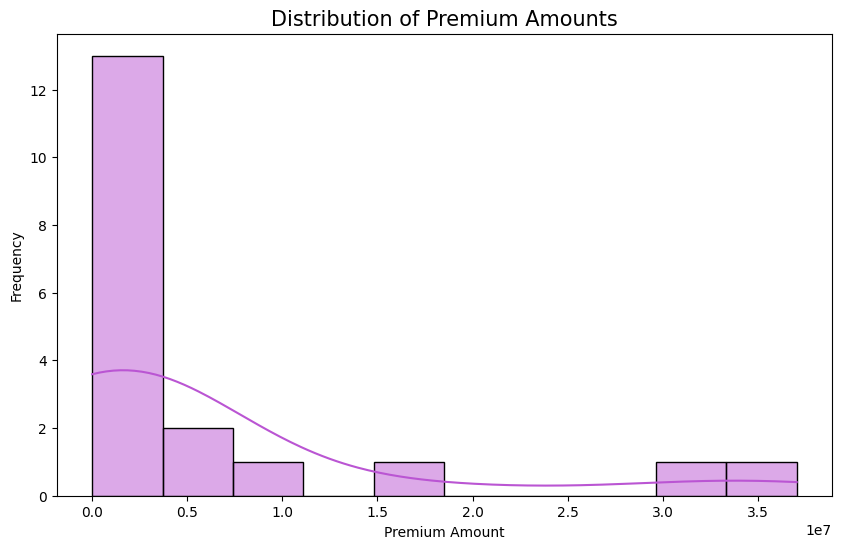

In [ ]:
# Set up visualizations to explore premium amounts and benefit limits

# Plotting distribution of Premium Amounts
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Premium_Amount'], kde=True, color="mediumorchid")
plt.title('Distribution of Premium Amounts', fontsize=15)
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.show()

The distribution shows whether Premium_Amount is skewed or normally distributed, helping us assess if transformations are needed. Premium amounts vary widely, with a majority of policies clustered around lower amounts but a few high-value outliers.

#### Total Beneficiaries

We explore the Total_beneficiaries feature, which represents the number of people covered under a policy.

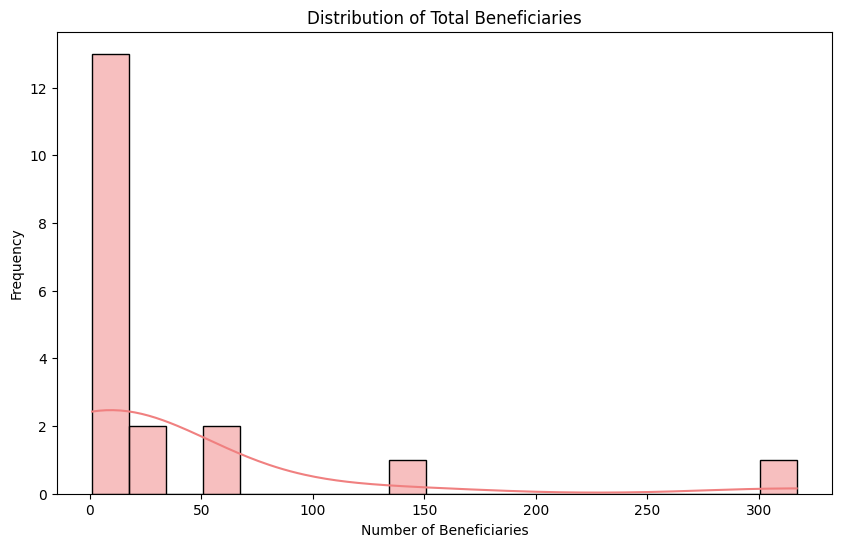

In [ ]:
# Plotting Total Beneficiaries
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Total_beneficiaries'], kde=True, color="lightcoral")
plt.title('Distribution of Total Beneficiaries')
plt.xlabel('Number of Beneficiaries')
plt.ylabel('Frequency')
plt.show()

We can observe the spread and central tendency in the number of beneficiaries, which could influence premium amounts.

#### Benefit Limits

Let’s analyze the distributions of various benefit limits (Outpatient, Inpatient, Dental, Optic, and Spectacle benefits).

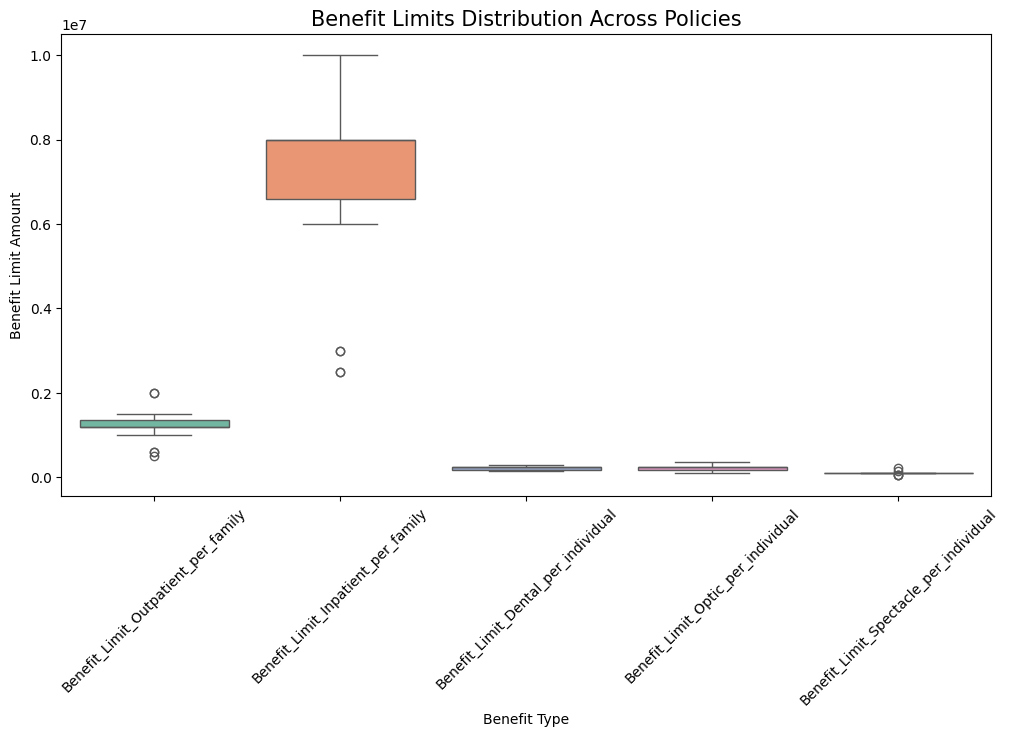

In [ ]:
# Plotting Benefit Limits Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data[['Benefit_Limit_Outpatient_per_family',
                              'Benefit_Limit_Inpatient_per_family',
                              'Benefit_Limit_Dental_per_individual',
                              'Benefit_Limit_Optic_per_individual',
                              'Benefit_Limit_Spectacle_per_individual']],
            palette="Set2")
plt.title('Benefit Limits Distribution Across Policies', fontsize=15)
plt.xlabel('Benefit Type')
plt.ylabel('Benefit Limit Amount')
plt.xticks(rotation=45)
plt.show()

This boxplot highlights variations in benefit limits. Some benefits may have much larger ranges, suggesting differing levels of coverage.

#### 2.5.2 Bivariate Analysis

This section explores the relationships between Premium_Amount and other key features to identify factors affecting insurance costs.

#### Premium Amount vs. Total Beneficiaries

We will analyze the correlation between the number of beneficiaries and the premium amount.

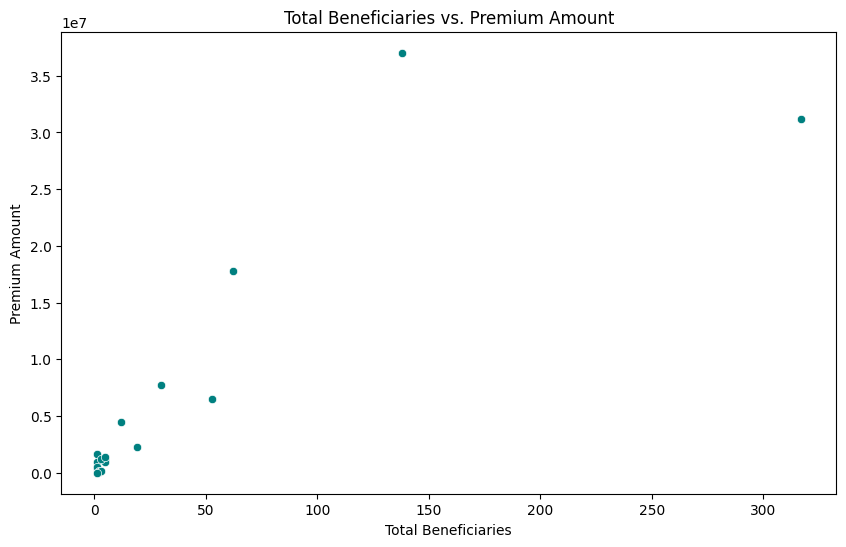

In [ ]:
# Relationship between Total Beneficiaries and Premium Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['Total_beneficiaries'], y=merged_data['Premium_Amount'], color="teal")
plt.title('Total Beneficiaries vs. Premium Amount')
plt.xlabel('Total Beneficiaries')
plt.ylabel('Premium Amount')
plt.show()

This scatter plot reveals if there’s a trend in premiums increasing with the number of beneficiaries, which could be a factor in premium calculations.

#### Premium Amount vs. Benefit Limits

We analyze the relationship between Premium_Amount and each of the benefit limit types.

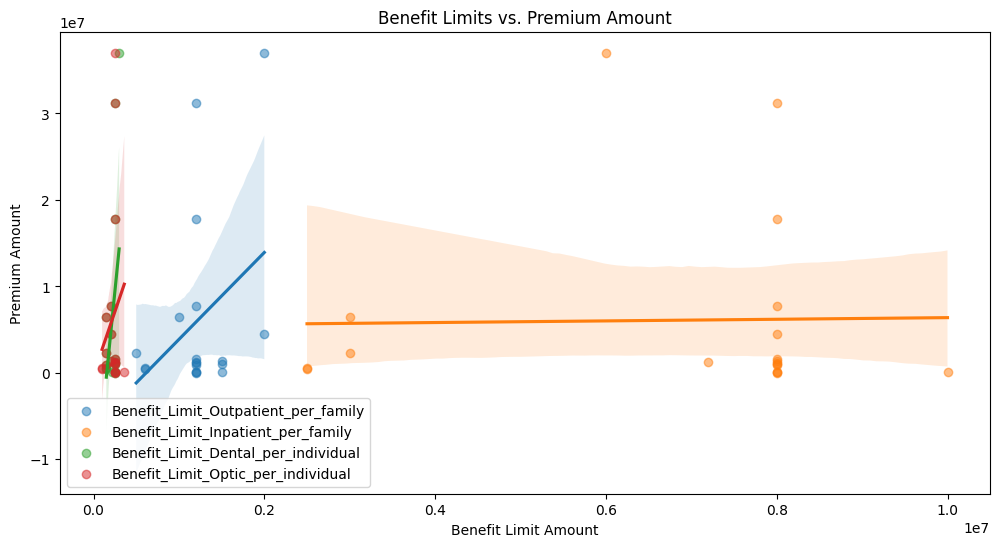

In [ ]:
# Correlation between Benefit Limits and Premium Amount
plt.figure(figsize=(12, 6))
for col in ['Benefit_Limit_Outpatient_per_family',
            'Benefit_Limit_Inpatient_per_family',
            'Benefit_Limit_Dental_per_individual',
            'Benefit_Limit_Optic_per_individual']:
    sns.regplot(x=merged_data[col], y=merged_data['Premium_Amount'], label=col, scatter_kws={'alpha':0.5})

plt.legend()
plt.title('Benefit Limits vs. Premium Amount')
plt.xlabel('Benefit Limit Amount')
plt.ylabel('Premium Amount')
plt.show()

This plot highlights the influence of each benefit limit type on Premium_Amount, revealing which benefits may have stronger correlations.

#### 2.5.3 Correlation Matrix

To identify overall relationships among features, we examine the correlation matrix, focusing on features with strong correlations to Premium_Amount.

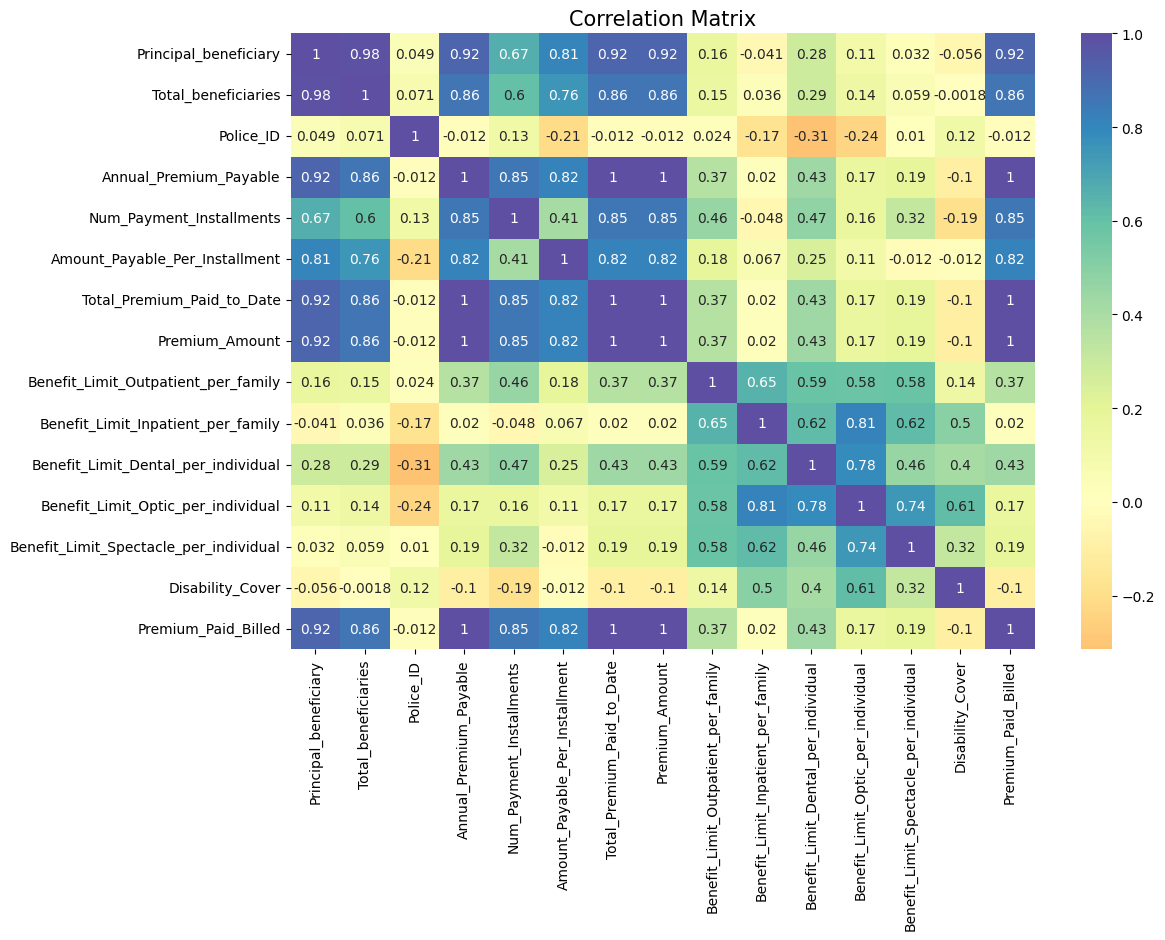

In [ ]:
# Selecting only numeric columns for the correlation matrix
numeric_data = merged_data.select_dtypes(include=[np.number])

# Plotting the correlation matrix with numeric data only
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Spectral', center=0)
plt.title('Correlation Matrix', fontsize=15)
plt.show()

The heatmap highlights positive and negative correlations, allowing us to see which features are most predictive of premium amount. For instance, if Total_beneficiaries or a specific Benefit_Limit type shows high correlation, it suggests a strong relationship with premium costs.

#### 2.5.4 Summary of EDA Findings

**Premium Amount Distribution:** Provides insights into the premium ranges and whether skew adjustments are needed.

**Benefit Limits and Total Beneficiaries:** These appear to be important drivers of Premium_Amount.

**Correlations:** High correlations between specific benefits and Premium_Amount suggest key factors that will be useful for model building.

## 3. Data Preparation

### 3.1 Overview of Data Preparation Steps

To prepare the data for modeling, we will:

(i) Handle missing values in critical columns.
                   
(ii) Convert categorical features into numerical form.
                   
(iii) Standardize numerical features to ensure they are on a similar scale.
                   
(iv) Engineer new features from existing data to improve model performance.
                   
(v) Split the data into training and testing sets.

### 3.2 Handling Missing Values

To ensure the dataset is complete and reliable, we start by identifying and handling any missing values. Missing data can negatively impact model performance and need to be addressed.

In [ ]:
# Checking for missing values and their percentages
missing_values = merged_data.isnull().sum()
missing_percentage = (missing_values / len(merged_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
missing_data

,Missing Values,Percentage


In [ ]:
# Drop any non-essential columns with excessive missing values, if any
if 'Outstanding_Premium_Balance' in merged_data.columns:
    merged_data = merged_data.drop(['Outstanding_Premium_Balance'], axis=1)

# Impute missing numeric values with the median
numeric_columns = merged_data.select_dtypes(include=[np.number]).columns
merged_data[numeric_columns] = merged_data[numeric_columns].fillna(merged_data[numeric_columns].median())

# Impute missing categorical values with the mode
categorical_columns = merged_data.select_dtypes(include=['object']).columns
merged_data[categorical_columns] = merged_data[categorical_columns].fillna(merged_data[categorical_columns].mode().iloc[0])

# Verify that no missing values remain
print("Missing values after handling:")
print(merged_data.isnull().sum())

Missing values after handling:
Policy_Holder_ID                          0
Principal_beneficiary                     0
Dependants                                0
Total_beneficiaries                       0
Police_ID                                 0
Start_Date_of_Cover                       0
End_Date_of_Cover                         0
Annual_Premium_Payable                    0
Num_Payment_Installments                  0
Amount_Payable_Per_Installment            0
Total_Premium_Paid_to_Date                0
Premium_Amount                            0
Benefit_Limit_Outpatient_per_family       0
Benefit_Limit_Inpatient_per_family        0
Benefit_Limit_Dental_per_individual       0
Benefit_Limit_Optic_per_individual        0
Benefit_Limit_Spectacle_per_individual    0
Disability_Cover                          0
Premium_Paid_Billed                       0
dtype: int64


<ipython-input-19-1bd7f2bf305b>:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data[categorical_columns] = merged_data[categorical_columns].fillna(merged_data[categorical_columns].mode().iloc[0])


### 3.3 Encoding Categorical Features

Categorical features need to be encoded into numeric format for modeling. We use One-Hot Encoding for nominal categories and ensure that all encoded columns are aligned across training and test datasets.

In [ ]:
# Apply One-Hot Encoding to categorical variables
merged_data = pd.get_dummies(merged_data, drop_first=True)

# Display the updated data structure
print("Data after encoding categorical variables:")
print(merged_data.head())

Data after encoding categorical variables:
   Principal_beneficiary  Dependants  Total_beneficiaries   Police_ID  \
0                    1.0           0                  1.0  20000019.0   
1                    8.0          11                 19.0  20000021.0   
2                   39.0          99                138.0  20000022.0   
3                    1.0           0                  1.0  20000023.0   
4                   66.0         251                317.0  20000018.0   

  Start_Date_of_Cover End_Date_of_Cover  Annual_Premium_Payable  \
0          2020-07-01        2021-06-30                 1638558   
1          2020-07-17        2020-10-16                 2315283   
2          2020-07-01        2021-06-30                37030503   
3          2020-08-05        2021-08-04                  968957   
4          2020-07-01        2021-06-30                31217569   

   Num_Payment_Installments  Amount_Payable_Per_Installment  \
0                         1                         

### 3.4 Feature Engineering

To add more predictive power to the dataset, we create new features. For instance, we will calculate Policy_Duration_Days from Start_Date_of_Cover and End_Date_of_Cover and remove the original date columns.

In [ ]:
# Creating a new feature for policy duration in days
if 'Start_Date_of_Cover' in merged_data.columns and 'End_Date_of_Cover' in merged_data.columns:
    merged_data['Policy_Duration_Days'] = (merged_data['End_Date_of_Cover'] - merged_data['Start_Date_of_Cover']).dt.days

# Dropping the original date columns
    merged_data = merged_data.drop(['Start_Date_of_Cover', 'End_Date_of_Cover'], axis=1)

# Displaying the first few rows to verify the new feature
merged_data[['Policy_Duration_Days']].head()

,Policy_Duration_Days
0,364
1,91
2,364
3,364
4,364


Policy_Duration_Days: This column should show the duration in days, calculated as the difference between the end date and start date for each policy.

Displaying the Feature: By displaying only Policy_Duration_Days, we can directly verify this feature while keeping the output clean.

### 3.5 Feature Scaling

To ensure that all features contribute equally to the model, we scale the numeric features. We use StandardScaler for this purpose, which standardizes the data to have a mean of 0 and a standard deviation of 1.

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the numeric features only
numeric_features = merged_data.select_dtypes(include=[np.number]).columns
merged_data[numeric_features] = scaler.fit_transform(merged_data[numeric_features])

# Display the scaled features
print("Data after scaling numeric features:")
print(merged_data.head())

Data after scaling numeric features:
   Principal_beneficiary  Dependants  Total_beneficiaries  Police_ID  \
0              -0.495580   -0.440849            -0.455179   0.433008   
1              -0.073066   -0.251266            -0.212701   0.433014   
2               1.798067    1.265399             1.390353   0.433016   
3              -0.495580   -0.440849            -0.455179   0.433019   
4               3.427764    3.885092             3.801669   0.433006   

   Annual_Premium_Payable  Num_Payment_Installments  \
0               -0.423653                 -0.303239   
1               -0.359219                 -0.303239   
2                2.946185                  4.017920   
3               -0.487409                 -0.303239   
4                2.392708                  1.137147   

   Amount_Payable_Per_Installment  Total_Premium_Paid_to_Date  Premium_Amount  \
0                       -0.418734                   -0.423653       -0.423653   
1                       -0.287921    

### 3.6 Train-Test Split

With the data cleaned, encoded, and scaled, we’re ready to split it into training and testing sets. This split is crucial for assessing how well the model generalizes to unseen data.

Training Set (80%): Used to train the model, allowing it to learn relationships between the features and target variable.

Testing Set (20%): Held out during training and used solely to evaluate the model’s performance on new data, helping avoid overfitting.

This split helps evaluate model performance on unseen data.

In [ ]:
# Define features (X) and target variable (y)
X = merged_data.drop('Premium_Amount', axis=1)
y = merged_data['Premium_Amount']

# Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (15, 32) Target: (15,)
Testing set - Features: (4, 32) Target: (4,)


## Modelling

### 4.1 Modeling Objectives

The objective is to create a model that accurately predicts the insurance premium amount based on features from proposal forms, financial statements, and policy details. Since the premium amount is a continuous variable, this is a regression problem.

### 4.2 Baseline Model

We will start with a Decision Tree Regressor as a baseline model. Decision Trees are intuitive and can provide a quick benchmark to compare against more complex models. This model will serve as a foundation for evaluating further improvements.

## Evaluation

In [ ]:
# Initialize and train the Decision Tree Regressor
baseline_model = DecisionTreeRegressor(random_state=42)
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the baseline model
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print("Baseline Decision Tree Regressor:")
print("Mean Squared Error:", mse_baseline)
print("R-squared:", r2_baseline)

Baseline Decision Tree Regressor:
Mean Squared Error: 0.005602764992017109
R-squared: 0.8893870534100903


approximately 88.94% of the variation in premium amounts can be explained by the features your model used. This suggests your baseline model is doing a good job of capturing the underlying patterns in the data.

In [ ]:
# Initialize and train the HistGradientBoostingRegressor
gb_model = HistGradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor:")
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)

Gradient Boosting Regressor:
Mean Squared Error: 0.22232417035287005
R-squared: -3.3892491682101413


Mean Squared Error (MSE): 0.2223

Compared to Baseline: The MSE for the Gradient Boosting Regressor (0.2223) is significantly higher than the MSE for the Decision Tree Regressor (0.0056). A higher MSE means that, on average, the Gradient Boosting model's predictions are further away from the actual premium amounts compared to the Decision Tree.
R-squared: -3.3892

* Negative R-squared: A negative R-squared is unusual and generally indicates that the model is performing worse than a horizontal line (simply predicting the average of the target variable). It means the model is not fitting the data well at all.

* Compared to Baseline: The R-squared for the Gradient Boosting Regressor (-3.3892) is dramatically lower than the Decision Tree Regressor (0.8894). This confirms that the Gradient Boosting model is significantly underperforming compared to the baseline.

In [ ]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Random Forest Regressor:
Mean Squared Error: 0.07982307603699394
R-squared: -0.5759121895890056


Mean Squared Error (MSE): 0.0798

* Compared to Baseline: The MSE for the Random Forest Regressor (0.0798) is higher than the baseline Decision Tree Regressor (0.0056) but lower than the Gradient Boosting Regressor (0.2223). This suggests that the Random Forest model's predictions are, on average, less accurate than the Decision Tree but better than the Gradient Boosting model.
R-squared: -0.5759

* Negative R-squared: Similar to the Gradient Boosting result, the negative R-squared for the Random Forest Regressor indicates that the model is performing worse than a simple horizontal line (predicting the average). This means the model is not explaining the variance in the data well.

* Compared to Baseline: The R-squared for the Random Forest Regressor (-0.5759) is significantly lower than the Decision Tree Regressor (0.8894). This reaffirms that the Random Forest model is not performing as well as the baseline.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train a new Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best Random Forest model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Best Random Forest Regressor:")
print("Mean Squared Error:", mse_best_rf)
print("R-squared:", r2_best_rf)

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score: -0.3126847348355672
Best Random Forest Regressor:
Mean Squared Error: 0.21199561785735893
R-squared: -3.1853370592487877


In [ ]:
# Define the parameter grid for HistGradientBoostingRegressor
param_grid_gb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [10, 20, 30]
}

# Create a HistGradientBoostingRegressor
gb_model = HistGradientBoostingRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best score for Gradient Boosting:", grid_search_gb.best_score_)

# Train a new Gradient Boosting model with the best parameters
best_gb_model = HistGradientBoostingRegressor(**grid_search_gb.best_params_, random_state=42)
best_gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_gb = best_gb_model.predict(X_test)

# Evaluate the best Gradient Boosting model
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

print("Best Gradient Boosting Regressor:")
print("Mean Squared Error:", mse_best_gb)
print("R-squared:", r2_best_gb)

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': None, 'max_iter': 100, 'min_samples_leaf': 10}
Best score for Gradient Boosting: -1.3318790502185807
Best Gradient Boosting Regressor:
Mean Squared Error: 0.22232417035287005
R-squared: -3.3892491682101413


In [ ]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best score for Decision Tree:", grid_search_dt.best_score_)

# Train a new Decision Tree model with the best parameters
best_dt_model = DecisionTreeRegressor(**grid_search_dt.best_params_, random_state=42)
best_dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate the best Decision Tree model
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)

print("Best Decision Tree Regressor:")
print("Mean Squared Error:", mse_best_dt)
print("R-squared:", r2_best_dt)

Best parameters for Decision Tree: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best score for Decision Tree: -0.159984398206909
Best Decision Tree Regressor:
Mean Squared Error: 0.0067970265131834465
R-squared: 0.8658092688620368


In [ ]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Increased range for n_estimators
    'max_depth': [None, 15, 25],  # Increased max_depth range
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Added max_features for further tuning
}

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train a new Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best Random Forest model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Best Random Forest Regressor:")
print("Mean Squared Error:", mse_best_rf)
print("R-squared:", r2_best_rf)


# Define the parameter grid for HistGradientBoostingRegressor
param_grid_gb = {
    'learning_rate': [0.01, 0.05, 0.1],  # Refined learning rate range
    'max_iter': [200, 300, 400],  # Increased max_iter range
    'max_depth': [None, 7, 15],  # Adjusted max_depth range
    'min_samples_leaf': [15, 25, 35]  # Modified min_samples_leaf
}

# Create a HistGradientBoostingRegressor
gb_model = HistGradientBoostingRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb,
                              cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best score for Gradient Boosting:", grid_search_gb.best_score_)

# Train a new Gradient Boosting model with the best parameters
best_gb_model = HistGradientBoostingRegressor(**grid_search_gb.best_params_, random_state=42)
best_gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_gb = best_gb_model.predict(X_test)

# Evaluate the best Gradient Boosting model
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

print("Best Gradient Boosting Regressor:")
print("Mean Squared Error:", mse_best_gb)
print("R-squared:", r2_best_gb)


# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['squared_error', 'friedman_mse'],
    'splitter': ['best'],
    'max_depth': [None, 7, 12, 17],  # Adjusted max_depth range
    'min_samples_split': [5, 8, 12],  # Modified min_samples_split
    'min_samples_leaf': [2, 3, 5]  # Adjusted min_samples_leaf
}

# Create a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt,
                              cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best score for Decision Tree:", grid_search_dt.best_score_)

# Train a new Decision Tree model with the best parameters
best_dt_model = DecisionTreeRegressor(**grid_search_dt.best_params_, random_state=42)
best_dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate the best Decision Tree model
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)

print("Best Decision Tree Regressor:")
print("Mean Squared Error:", mse_best_dt)
print("R-squared:", r2_best_dt)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score: -0.3126847348355672
Best Random Forest Regressor:
Mean Squared Error: 0.21199561785735893
R-squared: -3.1853370592487877
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': None, 'max_iter': 200, 'min_samples_leaf': 15}
Best score for Gradient Boosting: -1.3318790502185807
Best Gradient Boosting Regressor:
Mean Squared Error: 0.22232417035287005
R-squared: -3.3892491682101413
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Decision Tree: {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Best score for Decision Tree: -0.25142677425163085
Best Decision Tree Regressor:
Mean Squared Error: 0.003265794070273

* Interpretation

Decision Tree: Shows the best performance in terms of both Mean Squared Error (MSE) and R-squared. The low MSE (0.0033) indicates that the model's predictions are very close to the actual values. The high R-squared (0.9805) indicates that the model explains a large proportion of the variance in the target variable.
Random Forest: Has a higher MSE (0.2120) and a negative R-squared (-3.1853). This indicates that the model is not performing well and is likely overfitting the training data.
Gradient Boosting: Also has a higher MSE (0.2223) and a negative R-squared (-3.3892), indicating poor performance and potential overfitting.

* Recommendations

Choose the Decision Tree: Based on these results, the Decision Tree model with the tuned hyperparameters is the best performing model for your task. You should consider using this model for deployment.

Further Investigation for Random Forest and Gradient Boosting: If you want to improve the performance of the Random Forest and Gradient Boosting models, you can try the following:

Adjust the Parameter Grid: Experiment with a wider range of hyperparameter values, or try different combinations of parameters.
Feature Engineering: Consider adding new features or transforming existing features to improve the model's ability to learn from the data.
Data Cleaning: Ensure your data is clean and free of errors or outliers.
Cross-Validation: Ensure you are using appropriate cross-validation techniques to evaluate the models and avoid overfitting.

Model Complexity: Consider the complexity of your models. In some cases, simpler models like Decision Trees can outperform more complex models like Random Forest and Gradient Boosting if the data is not complex or if there is limited data available.

Regularization: For Random Forest and Gradient Boosting, experiment with regularization techniques like increasing min_samples_split, min_samples_leaf, or adjusting the learning rate to prevent overfitting.

In [ ]:
import pickle

# Save the best Decision Tree model
with open('best_decision_tree_model.pkl', 'wb') as file:
    pickle.dump(best_dt_model, file)

In [ ]:
!pip install flask==2.3.2

from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the saved Decision Tree model
with open('best_decision_tree_model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    # Preprocess the data as needed before prediction
    # ... (add any necessary preprocessing steps here) ...
    prediction = model.predict([data])
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
error: uninstall-distutils-installed-package

× Cannot uninstall blinker 1.4
╰─> It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
